## 시계열 특성 간단한 실습

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose # 계절성, 추세, 전차 분해하는 기능 제공하는 패키지 함수 
from statsmodels.graphics.tsaplots import plot_acf # 자기 상관 패키지 함수 

In [2]:
# 시계열 데이터 생성 
np.random.seed(42)
dates = pd.date_range(start="2023-01-01", periods=1000, freq='D')
values = np.random.randn(1000)

# 데이터 프레임 생성 
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})


# 데이터 프레임을 CSV 저장 
data.to_csv("./data/sample_time_data.csv", index=False, encoding='utf-8')

# 저장한 CSV 파일 읽기 
data = pd.read_csv("./data/sample_time_data.csv", parse_dates=['Date'] , index_col='Date')

print(data)

               Value
Date                
2023-01-01  0.496714
2023-01-02 -0.138264
2023-01-03  0.647689
2023-01-04  1.523030
2023-01-05 -0.234153
...              ...
2025-09-22 -0.281100
2025-09-23  1.797687
2025-09-24  0.640843
2025-09-25 -0.571179
2025-09-26  0.572583

[1000 rows x 1 columns]


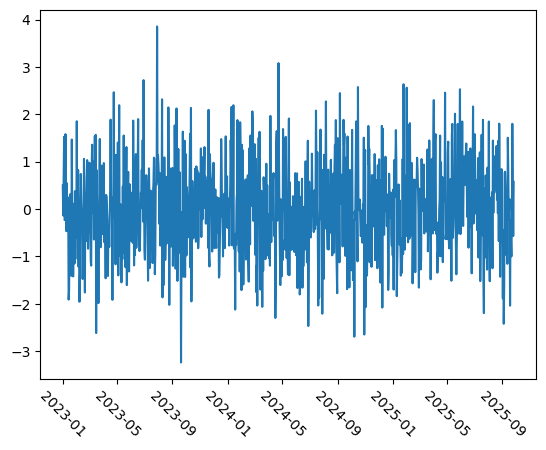

In [3]:
plt.plot(data.index, data['Value'])
plt.xticks(rotation=-45)  
plt.show()

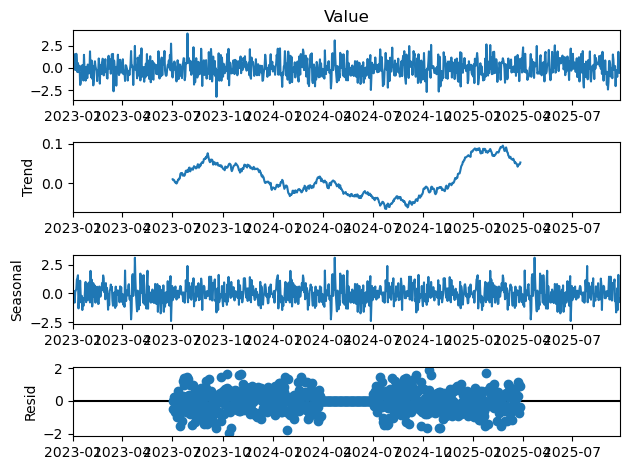

In [4]:
# 추세 분석 
result = seasonal_decompose(data['Value'], model='additive', period=365)
result.plot()
plt.show()

추세 분석을 위해 계절성 분해를 수행하고 결과를 시각화 한다.
계절성 분해는 주어진 시계열 데이터를 추세, 계절성, 잔차 성분으로 분해하는 작업이다.<br>
차례대로 원본데이터, 시계열 데이터의 추세성분, 게열 데이터의 계절성 성분, 시계열 데이터의 잔차 성분이다.<br>
추세는 장기적인 변동 패턴이며, 데이터의 일반적인 증감 경향을 보여주고, 계절성은 주기적으로 반복되는 패턴이며 데이터의 특정 기간별 패턴을 보여준다. 잔차는 추세와 계절성을 제외한 나머지 변동 요소를 나타낸다. 잔차 그래프를 통해 추세와 계절성 외의 추가적인 변동 패턴이 있는지 확인할 수 있다.

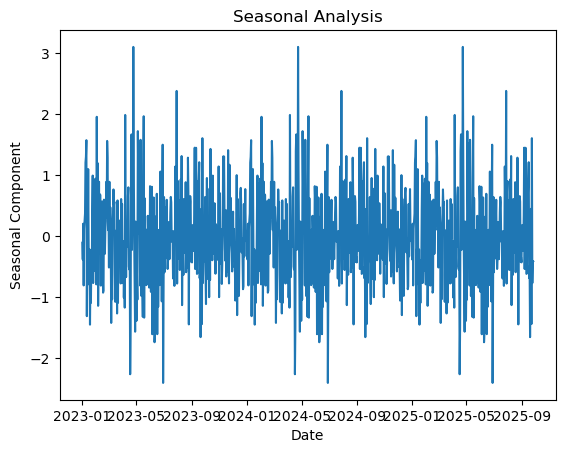

In [5]:
# 계절성 분석
seasonal_component = result.seasonal
plt.plot(seasonal_component)
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.title('Seasonal Analysis')
plt.show()

시계열 뎅터에서 추출한 계절성 성분을 보여준다. 계절성 성분은 주기적으로 반복되는 패턴을 나타내며, 데이터의 특정 기간별 패턴을 보여준다. 이 그래프에서는 x축이 날짜, y축이 계절성 성분의 값이다.

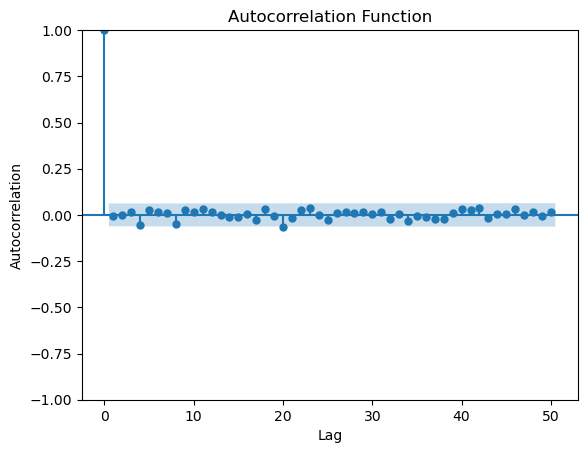

In [6]:
# 자기 상관성 분석
plot_acf(data['Value'], lags = 50)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function')
plt.show()

x축은 lag(시차), y축은 자기상관성의 값이다. 시차는 현재 데이터의 이전 데이터 사이의 간격을 의미한다. ACF 그래프는 각 시차에서의 자기 상관성 값을 나타내며, 시차가 증가함에 따라 자기 상관성이 어떻게 변하는지 보여준다.<br>
ACF 값이 양수면 양의 상관성이 있는 것으로, 해당 시차에서의 데이터 간에 양의 상관 관계가 있음을 의미하며, ACF값이 음수면 음의 상관성이 있는 경우로 해당 시차에서의 데이터 간에 음의 상관 관계가 있음을 의미한다. 시차가 0인 경우 자기 상관성은 항상 1

시계열 데이터의 중요성
- 예측 및 추세 분석
- 의사 결정 지원
- 이상 탐지
- 자원 할당과 계획

시계열 분석의 목적
- 패턴 파악
- 예측
- 이상 탐지
- 인과 관계 파악
- 모델링과 통계 검증

주요 시계열 분석 기법
- 이동 평균
- 지수평활법
- ARIMA
- SARIMA
- Prophet
- LSTM
- VAR